### Group members (first and last names):
- ####  *Abdelhak Kermia*


# Introduction
In this assignment, you will begin by experimenting with data augmentation techniques. You’ll then answer multiple-choice questions to test your understanding of these methods. Finally, you will train a Convolutional Neural Network (CNN) on the MNIST dataset, comparing the results with and without data augmentation to observe its impact on model accuracy and generalization.

---
## How to pass the assignment?
Below, you will find the exercise questions. Each question that awards points is numbered and displays the available points in this format: **(0 pts)**.

### Answering Questions
- Provide your answers in the cell directly below each question.
- Use **Markdown** for text-based answers (in **English**).
- Use **code cells** for implementations.

### Critical Thinking Questions and Bonus Exercises
- Some questions are marked with a 🧠 (Critical Thinking) or a ⭐ (Bonus Exercise). These are for self-reflection and extra practice.
- They are **optional** and do **not** award any points.
- Answering them can help reinforce your understanding.

### Important Rules
- Only use the Python packages introduced in the assignment. Using unauthorized packages will result in **0 points** for the affected question.
- Follow dataset instructions carefully.
  - If no new dataset is mentioned, continue using the one from the previous task.
  - Using a different dataset than instructed will result in **0 points** for that question.
- All code must run correctly.
  - If your code does not execute, you will receive a **50% deduction** for that question.
  - Always test your code before submitting.
- Incorrect or incomplete answers receive **0 points**.
  - Partial credit may be awarded if the core idea is correct **and** the instructions are followed precisely.
  - If you do not follow the instructions, you will receive **0 points**, regardless of effort or length.
- Do not provide overly detailed or off-topic answers. Stay focused on what is asked. Extra information does not earn extra points.

### Important Notes
- Save your work frequently! (Ctrl + S)
- Before submitting, `Restart Session and Run All` cells to ensure everything works correctly.
- **You need at least 28 points out of 42 (66%) to pass ✅**
---

In [1]:
points = 42

# 1. Data Augmentation Methods (12 points)

Transforms in the `torchvision.transforms` module can be combined using `Compose` and offer fine-grained control through functional transforms. Some transformations work with both PIL and tensor images, while others are specific to one format. Conversion transforms allow for changing between PIL images and tensors. Transformations that accept tensor images also support batches, where a batch is a tensor of shape (B, C, H, W), with B being the number of images, C the channels, and H, W the image dimensions.

🤯 **HELP:** [more info](https://pytorch.org/vision/0.13/transforms.html)

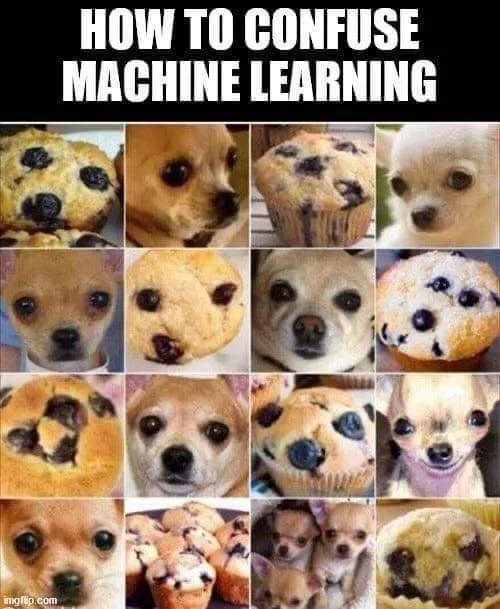


In [2]:
# These are the packages you'll need today
# If you're running on a local environment, make sure everything you need is installed :)

# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import random

# PyTorch libraries for deep learning
import torch
from torchvision import datasets
from torchvision.transforms import v2
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset

# Other libraries
from tqdm.notebook import tqdm
import PIL

# Set random seed
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Set up device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


#### 1.1 **(2pts) Resize and visualize a color image. Assign it to a variable named `image`.**

- Please use the `dog.jpg` file provided with the assignment.
- Use the [PIL library](https://www.geeksforgeeks.org/python-pil-image-open-method/) to open the image.
- Resize the image to 320x320 pixels.
- Print the following details:
    - The type of the image.
    - The shape of the image.
- Use `matplotlib` to display the image.

❓ **Hint:** To discover useful methods, explore the available options:
- In Colab, type `object.` and scroll through the suggestions.
- In JupyterLab, type `object. and press Tab` to see a list of methods and attributes.

**Example (unrelated to this task):**

Suppose you have a string:
```
text = "hello"
```
If you type `text.` and scroll (or press Tab), you'll see methods like `upper()`, `lower()`, and others you can use!

Now, apply the same idea to your `image` object.

💡 **TIP:** To make the plot more aesthetic, add `plt.axis('off');` at the end. Do you know what effect this has on the image display?

Type : <class 'PIL.Image.Image'>
Shape : (320, 320) RGB


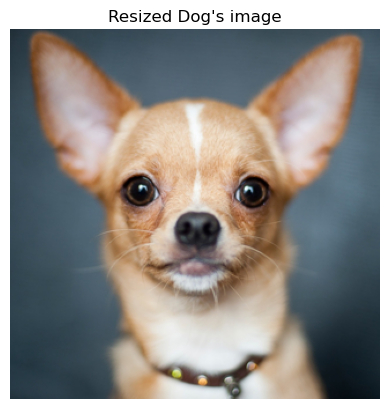

In [3]:
from PIL import Image # not done before
image= Image.open("../dog.jpg").resize((320,320)) # image file must be in the same directory/folder / no path
print("Type :", type(image)) #PIL type
print("Shape :", image.size, image.mode) #PIL shape and colors
# or image_np = np.array(image); print("Shape", image_np.shape) #numpy version
plt.imshow(image) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.title("Resized Dog's image")
plt.axis('off')
plt.show()

#### **🧠 What do the numbers in the tensor represent?**
pixel x pixel : height x width, mode is for the color mode

#### 1.2 **(7 pts) Implement the following 7 transformations.**
1. Horizontal Flip
2. Random Crop
3. Photometric Distort
4. Random Resized Crop
5. Random Rotation
6. Random Affine Transform
7. *One additional transformation of your choice*
- For each transformation, save it as a variable.
- Choose appropriate parameters for each transformation.
- Use the `plot_transform` function below to display 10 examples of each transformation.

📖 [V2 Transforms Documentation](https://pytorch.org/vision/main/transforms.html#v2-api-reference-recommended)

📖 [Example Code for V2 Random Crop Transformation](https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_getting_started.html#sphx-glr-auto-examples-transforms-plot-transforms-getting-started-py)

In [4]:
def plot_transform(image, transformation_fn, cmap=None):
    # Check if image is a tensor and convert it to a numpy array for visualization
    if isinstance(image, torch.Tensor):
        image = image.squeeze(0)  # Remove channel dimension if it's a grayscale image (C, H, W) -> (H, W)
        image = image * 0.5 + 0.5  # Denormalize the image from [-1, 1] to [0, 1]
        image = image.numpy()  # Convert tensor to NumPy array

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 5, 1)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title('Original Image')

    # Generate augmented images
    for i in range(9):
        # Apply transformation function
        transformed_image = transformation_fn(image)

        # Convert transformed image back to numpy if it's a tensor
        if isinstance(transformed_image, torch.Tensor):
            transformed_image = transformed_image.squeeze(0)  # Remove channel dimension
            transformed_image = transformed_image * 0.5 + 0.5  # Denormalize
            transformed_image = transformed_image.numpy()

        plt.subplot(2, 5, i+2)
        plt.imshow(transformed_image, cmap=cmap)
        plt.axis('off')
        plt.title(f'Augmentation {i+1}')

    plt.tight_layout()
    plt.show()

In [5]:
hf = v2.RandomHorizontalFlip(p=0.5)

In [6]:
crop = v2.RandomCrop(size=(256,256))

In [7]:
rpd = v2.RandomPhotometricDistort(brightness=(0.5,1.5),contrast=(0.5,1.5),saturation=(0.5,1.5), hue=(-0.1,0.1))

In [8]:
rs_crop = v2.RandomResizedCrop(size=(256,256))

In [9]:
rot=v2.RandomRotation(degrees=(-45,45))

In [10]:
at= v2.RandomAffine(degrees=(-30,30), translate=(0.2,0.2), scale=(0.9,1.1), shear=10)

In [11]:
blur = v2.GaussianBlur(kernel_size=(5,5), sigma=(0.1, 2.0))

In [12]:
points -= 3.5 # No visualisations

#### 1.3 **(2pts) Combine all the transformations using `v2.Compose`.**
- Apply the transformations sequentially by chaining them with `v2.Compose`.
- Use the `plot_transform` function to display 10 examples of the transformed images.

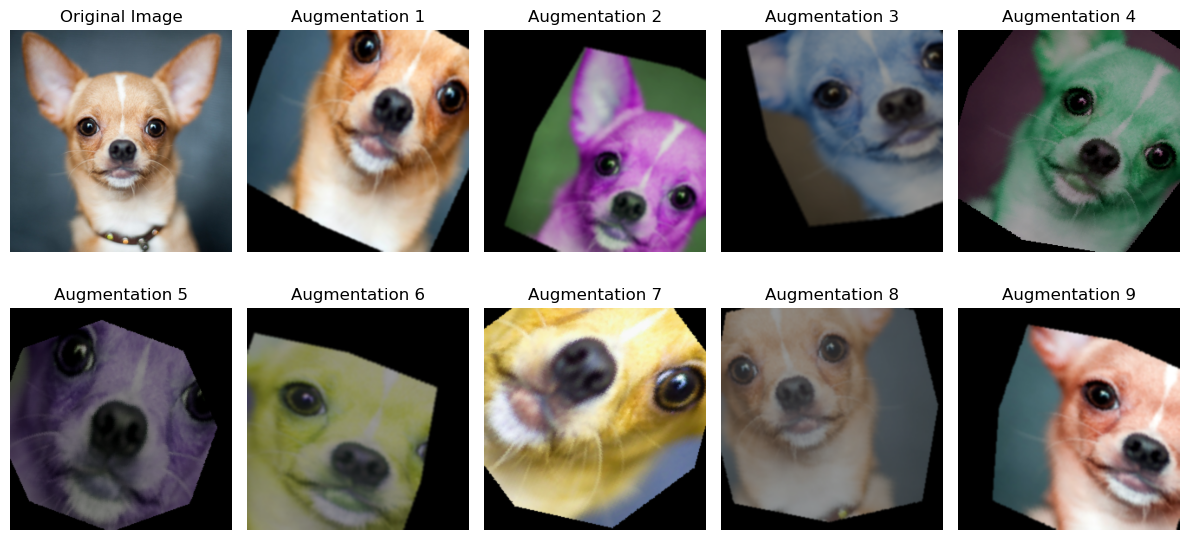

In [13]:
composed_transforms = v2.Compose([
    hf,
    crop,
    rpd,
    rs_crop,
    rot,
    at,
    blur
])
plot_transform(image,composed_transforms)

#### 1.4 **(2pts) Are the samples generated by combining all 7 transformations suitable for data augmentation?**
- Answer in 1-2 sentences.

- The combination of the 7 transformations allows for a good variety of transformations of the images, which should give the model a better ability to generalise the data.
- However, depending on the context/task at hand, including extreme variations or too many variations/ and combinations, such as unrealistic colors or the black background parts here for example, could be detrimental. There is no "one size fits all" solution for all datasets/tasks.

---
# 2. Data Augmentation Fundamentals (12 points)

Before training a model, let's test your understanding of data augmentation with these questions. For each topic, identify which statements are TRUE ✅ and which are FALSE ❌. Each question may have 1, 2, 3, or 4 correct answers.

- 4 correct answers: 2 points
- 3 correct answers: 1 point
- 2 or fewer correct answers: 0 points

💡 In Google Colab, you can easily add emojis to markdown cells by typing `:` followed by the emoji's name. For example, typing `:light-bulb` will display a light bulb emoji. This feature is also available as an extension in many IDEs.

❗ **TIP:** If a term is unfamiliar to you, look it up in [Google's ML Glossary](https://developers.google.com/machine-learning/glossary) for a simple explanation.

#### 2.1 **(2pts) Which of the following describe the effect of the listed transformations?**
 A. Photometric Distort: Alters brightness, contrast, saturation, and hue to simulate lighting variation. ✅

 B. Random Resized Crop: Randomly crops and resizes to target shape.✅

 C. Random Rotation: Introduces minor angle variation. ✅

 D. Random Affine Transform: Combines rotation, translation, shear, and scaling to simulate natural image deformation. ✅



#### 2.2 **(2pts) In which scenarios is it appropriate to use data augmentation?**
 A. When you have a small dataset and want to reduce overfitting. ✅

 B. When training a model on structured tabular data. ❌

 C. When labels change depending on image distortions. ❌

 D. When the task involves natural images where multiple viewpoints are valid. ✅



#### 2.3 **(2pts) Why and when does data augmentation work best?**
 A. It acts as a form of regularization and reduces overfitting. ✅

 B. It guarantees higher accuracy regardless of the task or dataset. ❌

 C. It works best when the augmented samples are label-preserving and semantically valid. ✅

 D. It is always beneficial, even in large-scale datasets like ImageNet. ❌



#### 2.4 **(2pts) Which of the following tasks benefit most from data augmentation?**
 A. Predicting housing prices using structured features. ❌

 B. Sentiment analysis on a fixed text dataset. ❌

 C. Image classification with limited training data. ✅

 D. Object detection in varied lighting and angles. ✅



#### 2.5 **(2pts) What are best practices when applying data augmentation?**
 A. Augmentations should be applied after training, during evaluation only. ❌

 B. Tailor augmentations to the specific data domain and task. ✅

 C. Always apply all augmentations at once to maximize diversity. ❌

 D. Combine geometric and color-based transforms for better generalization. ✅





#### 2.6 **(2pts) How do you check the shapes of a PIL image and of a torch tensor?**
 A. PIL: `image.shape`, Tensor: `image.shape` ❌

 B. PIL: `image.size()`, Tensor: `image.shape()` ❌

 C. PIL: `image.shape`, Tensor: `image.size` ❌

 D. PIL: `image.size`, Tensor: `image.shape` ✅





#### **🧠 Which of the following data augmentation techniques are appropriate for chest X-ray images?**
1. Horizontal Flip
2. Random Crop
3. Photometric Distort
4. Random Resized Crop
5. Random Rotation
6. Random Affine Transform

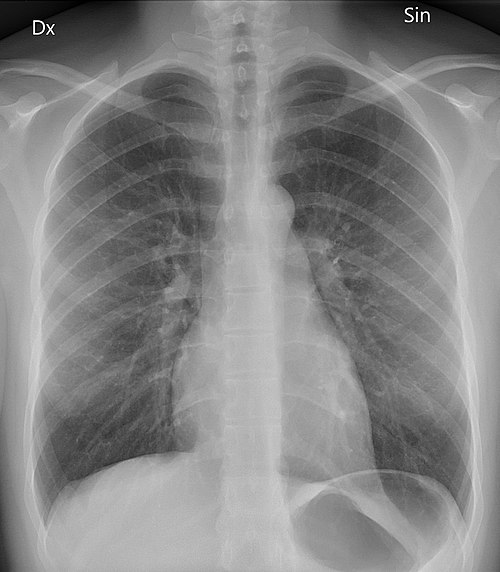

Random Affine : simulate small rotation, shifts and zooms realistic for imagery with body placement and measurements, Random rotation with small angles: should help with alignment of the body on the image. Maybe some photometric variation: brightness, contrast.
- In general: probably don't use transforms that distort anatomy, flip asymmetrical organs/chirality or markings/comments, crop important zones, use color variation/ must be grayscale compatible.

---
# 3. Coding (17 points)

### **Task:** Implement and Apply Data Augmentation to MNIST Images

In this coding section, you will work with the MNIST dataset, which consists of handwritten digits. You are asked to implement data augmentation using a set of transformations provided below.

#### 3.1 **(2pts) Define the augmented transformations for image preprocessing as specified below:**
You are required to create a sequence of transformations for augmenting the input image. Your transformations should follow these steps:

- Convert the image to the Image class to ensure compatibility with `torchvision.transforms`.
- Resize the tensor to 28x28 pixels.
- Apply a random vertical flip with a 50% probability.
- Apply a random horizontal flip with a 50% probability.
- Apply a random rotation of up to 45 degrees, filling any background area with black.
- Convert the image to `torch.float32` and scale it to the range [0, 1].
- Normalize the image to the range [-1, 1].

You can use `torchvision.transforms.v2` to implement these transformations. Refer to the imports section at the start of the notebook for the required import structure.

In [14]:
# Basic transforms
transforms_basic = v2.Compose([
    v2.ToImage(),
    v2.Resize((28, 28)),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.5,), std=(0.5,)),
])

# Augmentation transforms
### YOUR CODE HERE ###
transforms_aug = v2.Compose([
    v2.ToImage(),
    v2.Resize((28, 28)), # resize at the beginning better
    v2.RandomVerticalFlip(p=0.5), # Default already 0.5
    v2.RandomHorizontalFlip(p=0.5), # Default already 0.5
    v2.RandomRotation(45,fill=0),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.5,), std=(0.5,)),
])

######################

# Load MNIST dataset with basic and augmentation transformations
train_basic = datasets.MNIST(root='./data', train=True, download=True, transform=transforms_basic)
train_aug = datasets.MNIST(root='./data', train=True, download=True, transform=transforms_aug)
val = datasets.MNIST(root='./data', train=False, download=True, transform=transforms_basic)



Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 6.00MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 146kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.44MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.94MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#### 3.2 **(2pts) Save the 14th image and label from `train_basic` and apply the defined transformations.**
- Access the 14th image and label from the `train_basic` dataset (remember, Python uses 0-based indexing). The label should be 6.
- Print the following details:
    - The label of the image.
    - The type of the image (after transformations).
    - The shape of the image.
- Apply the transformations you defined in the previous question to the images.
- Call the `plot_transform` function (defined earlier in the notebook) to visualize the augmented image. Note that the `MNIST` dataset consists of grayscale images, so ensure the images are displayed in black and white.

Label: 6
Image Type: <class 'torchvision.tv_tensors._image.Image'> // Image Shape: torch.Size([1, 28, 28])
Augmented Image Type <class 'torchvision.tv_tensors._image.Image'>  // Augmented Image Shape torch.Size([1, 28, 28])


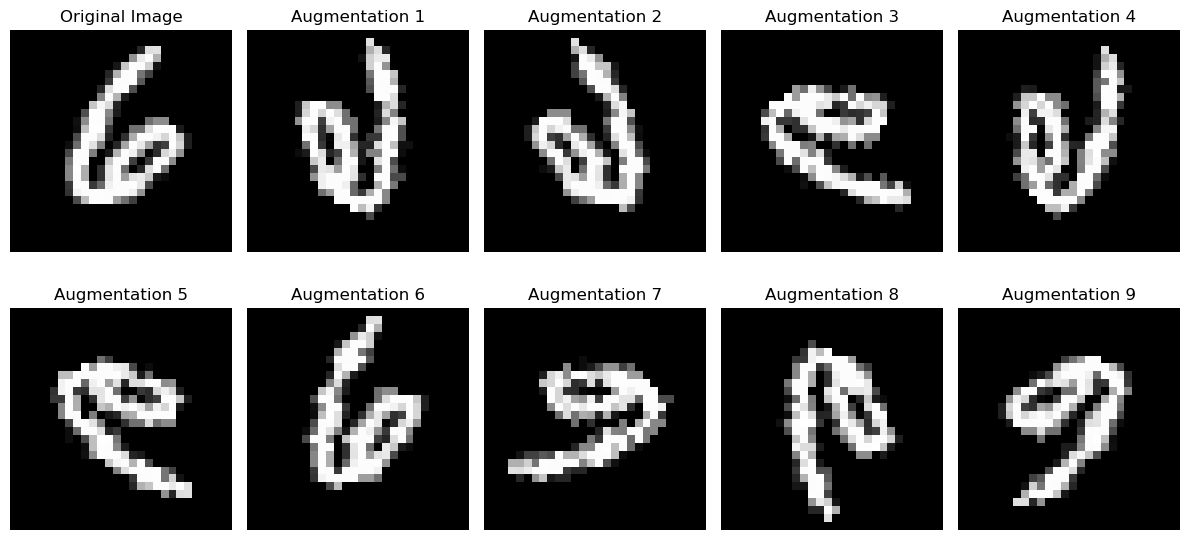

In [15]:
#Access the 14th image (index 13) and its label from train_basic
image, label = train_basic[13]

#Apply the augmentation transformations
augmented_img = transforms_aug(image)

# Print details about the images
print("Label:", label)
print("Image Type:", type(image), "// Image Shape:", image.shape)
print("Augmented Image Type", type(augmented_img)," // Augmented Image Shape", augmented_img.shape)

#Visualize using plot_transform (MNIST is grayscale)
plot_transform(image,transforms_aug, cmap='gray')

#### 3.2 **(5pts)  Rewrite a Simple Convolutional Neural Network Using `nn.Sequential`.**
```
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3)

        # Define a flatten layer
        self.flatten = nn.Flatten()

        # Define fully connected layers
        self.fc1 = nn.Linear(64 * 22 * 22, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

```
- Re-implement the `SimpleCNN` model using `nn.Sequential`.
  - Do not modify the architecture (e.g., layer sizes, order, or activations).
  - Ensure your implementation is functionally equivalent to the original.
  - Name your model class `SimpleCNNSequential`.
  - Structure the entire architecture as a single `nn.Sequential block`.
- The forward method should simply pass the input through this `nn.Sequential` module.
- Instantiate your model as `CNN`.
- Print the model architecture to verify it matches the original.

You may use `torch` and `torch.nn`.

In [16]:
# Transform in sequential block
class SimpleCNNSequential(nn.Module):
    def __init__(self):
        super(SimpleCNNSequential, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3),
            nn.ReLU(),
            nn.Flatten(1),
            nn.Linear(64 * 22 * 22, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        return self.model(x)

In [17]:
# Instantiate the model and print the model architecture
CNN = SimpleCNNSequential()
print(CNN)
# Send the model to the GPU (or CPU if not cuda)
CNN = CNN.to(device)

SimpleCNNSequential(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=30976, out_features=512, bias=True)
    (8): ReLU()
    (9): Linear(in_features=512, out_features=256, bias=True)
    (10): ReLU()
    (11): Linear(in_features=256, out_features=10, bias=True)
  )
)


---
### Defining some helpful functions
Here are some handy training, evaluation, and plotting functions. Make sure you understand what they do.


In [18]:
# These functions were adapted from Deep Learning by Prof. Paolo Favaro, University of Bern

def train_epoch(model, train_dataloader, optimizer, loss_fn):
    losses = []
    correct_predictions = 0
    # Iterate mini batches over training dataset
    for features, labels in tqdm(train_dataloader):
        features = features.to(device)
        labels = labels.to(device)
        # Run predictions
        output = model(features)
        # Set gradients to zero
        optimizer.zero_grad()
        # Compute loss
        loss = loss_fn(output, labels)
        # Backpropagate (compute gradients)
        loss.backward()
        # Make an optimization step (update parameters)
        optimizer.step()
        # Log metrics
        losses.append(loss.item())
        predicted_labels = output.argmax(dim=1)
        correct_predictions += (predicted_labels == labels).sum().item()
    accuracy = 100.0 * correct_predictions / len(train_dataloader.dataset)
    # Return loss values for each iteration and accuracy
    mean_loss = np.array(losses).mean()
    return mean_loss, accuracy

def evaluate(model, dataloader, loss_fn):
    losses = []
    correct_predictions = 0
    with torch.no_grad():
        for features, labels in dataloader:
            features = features.to(device)
            labels = labels.to(device)
            # Run predictions
            output = model(features)
            # Compute loss
            loss = loss_fn(output, labels)
            # Save metrics
            predicted_labels = output.argmax(dim=1)
            correct_predictions += (predicted_labels == labels).sum().item()
            losses.append(loss.item())
    mean_loss = np.array(losses).mean()
    accuracy = 100.0 * correct_predictions / len(dataloader.dataset)
    # Return mean loss and accuracy
    return mean_loss, accuracy

def plot(train_losses, val_losses, train_accuracies, val_accuracies, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1,2,1)
    plt.plot(np.arange(len(train_losses)), train_losses, label='Train Loss')
    plt.plot(np.arange(len(val_losses)), val_losses, label='Val Loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.title(f'{title}: Loss Curves')

    plt.subplot(1,2,2)
    plt.plot(np.arange(len(train_accuracies)), train_accuracies, label='Train Acc')
    plt.plot(np.arange(len(val_accuracies)), val_accuracies, label='Val Acc')
    plt.legend()
    plt.xlabel('Epoch')
    plt.title(f'{title}: Accuracy Curves')

    plt.tight_layout()
    plt.show()

def train_evaluate_plot(model, train_loader, val_loader, optimizer, loss_fn, n_epochs, title, results_dict):
    """Train a model, evaluate it, plot the results, and update a results dictionary."""

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(n_epochs):
        model.train()
        train_loss, train_accuracy = train_epoch(model, train_loader, optimizer, loss_fn)
        model.eval()
        val_loss, val_accuracy = evaluate(model, val_loader, loss_fn)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print('Epoch {}/{}: train_loss: {:.4f}, train_acc: {:.2f}%, val_loss: {:.4f}, val_acc: {:.2f}%'.format(
            epoch+1, n_epochs, train_loss, train_accuracy, val_loss, val_accuracy
        ))

    # Update the results dictionary
    results_dict['types'].append(title)
    results_dict['final_val_losses'].append(val_losses[-1])
    results_dict['final_val_accs'].append(val_accuracies[-1])
    results_dict['val_loss_curves'].append(val_losses)

    # Plot curves
    plot(train_losses, val_losses, train_accuracies, val_accuracies, title)

    return


The RAMDatasetWrapper class loads the entire dataset into memory, making data access faster during training, which results in a more efficient and quicker training process. However, it is only suitable for datasets that can fit in your system's available RAM. If it doesn't work for you, skip this step.

In [19]:
# This function was adapted from Deep Learning by Prof. Paolo Favaro, University of Bern

class RAMDatasetWrapper(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.data = [sample for sample in tqdm(dataset)]  # Load all the samples into RAM
        self.n = len(self.data)

    def __getitem__(self, ind):
        return self.data[ind]  # Return the sample without transformation

    def __len__(self):
        return self.n


In this section, we create small random subsets of the MNIST dataset for both training and validation. By selecting only 600 samples for training and 100 samples for validation, we speed up the training process and deliberately cause the model to overfit. This helps in quickly testing model performance and experimenting with different hyperparameters or regularization techniques.

The smaller dataset makes it easier to observe overfitting since the model will have limited data to learn from. This approach is useful for debugging, model experimentation, and understanding overfitting behaviors in a controlled setting.

In [20]:
# Number of samples to select
num_samples = 600
val_samples = 100

# Select random indices for training and validation sets
train_indices = np.random.choice(len(train_basic), num_samples, replace=False).tolist()
val_indices = np.random.choice(len(val), val_samples, replace=False).tolist()

# Create subsets for train and validation datasets
train_basic_subset = Subset(train_basic, train_indices)
train_aug_subset = Subset(train_aug, train_indices)
val_subset = Subset(val, val_indices)

# Wrap datasets with RAMDatasetWrapper
train_wrapper_basic = RAMDatasetWrapper(train_basic_subset)
train_wrapper_aug = RAMDatasetWrapper(train_aug_subset)
val_wrapper = RAMDatasetWrapper(val_subset)

# Create DataLoaders
train_loader_basic = DataLoader(train_wrapper_basic, batch_size=32, shuffle=True)
train_loader_aug = DataLoader(train_wrapper_aug, batch_size=32, shuffle=True)
val_loader = DataLoader(val_wrapper, batch_size=32, shuffle=False)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

---

#### 3.3 **(1pt) Print the number of samples in the two training subset and the validation subset.**


In [21]:
print("# of Samples in train_basic :", len(train_basic_subset))
print("# of Samples in train_aug :", len(train_aug_subset))
print("# of Samples in val_subset :", len(val_subset))

# of Samples in train_basic : 600
# of Samples in train_aug : 600
# of Samples in val_subset : 100


### Defining hyperparameters

In [22]:
# Loss, Optimizer, Epochs
criterion = nn.CrossEntropyLoss()
optimizer_CNN = optim.Adam(CNN.parameters(), lr=0.001)
n_epochs = 10


### Defining the empty results dictionary

In [23]:
results = {
    'types': [],
    'final_val_losses': [],
    'final_val_accs': [],
    'val_loss_curves': [],
}

#### 3.4 **(2pts) Use the `train_evaluation_plot` function defined above to evaluate and visualize the performance on both the basic and augmented datasets.**
⏳ On CPU, each epoch will take approximately 7 seconds to run.

  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 1/10: train_loss: 1.4697, train_acc: 48.67%, val_loss: 0.4411, val_acc: 84.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 2/10: train_loss: 0.5051, train_acc: 83.67%, val_loss: 0.4215, val_acc: 83.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 3/10: train_loss: 0.1760, train_acc: 95.17%, val_loss: 0.1732, val_acc: 94.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 4/10: train_loss: 0.0648, train_acc: 98.17%, val_loss: 0.3141, val_acc: 89.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 5/10: train_loss: 0.0455, train_acc: 98.17%, val_loss: 0.2351, val_acc: 96.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 6/10: train_loss: 0.0306, train_acc: 99.00%, val_loss: 0.3823, val_acc: 90.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 7/10: train_loss: 0.0497, train_acc: 98.50%, val_loss: 0.2715, val_acc: 91.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 8/10: train_loss: 0.0589, train_acc: 98.50%, val_loss: 0.3316, val_acc: 93.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 9/10: train_loss: 0.0283, train_acc: 98.83%, val_loss: 0.3148, val_acc: 92.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 10/10: train_loss: 0.0596, train_acc: 98.33%, val_loss: 0.5392, val_acc: 87.00%


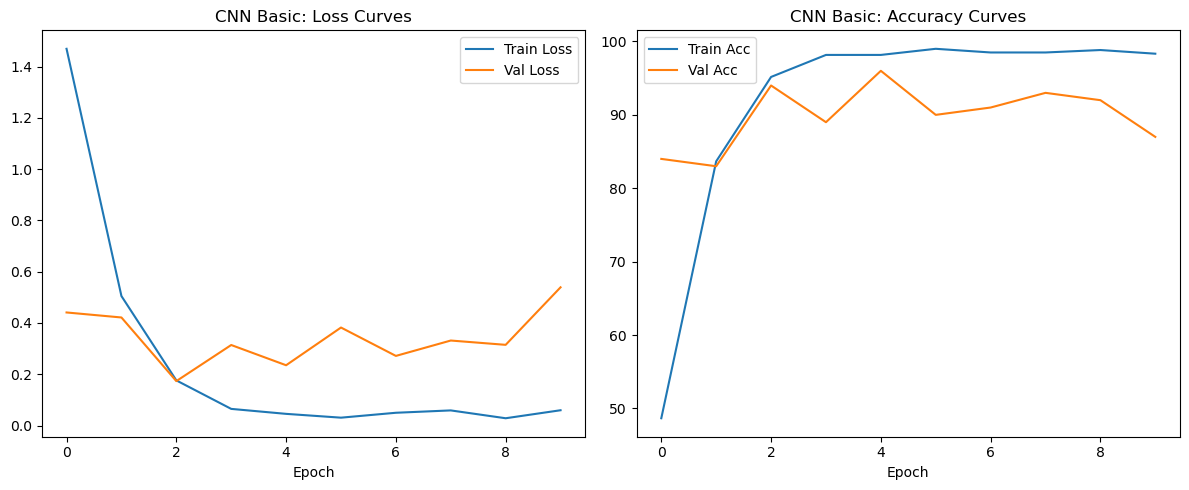

  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 1/10: train_loss: 2.0906, train_acc: 24.17%, val_loss: 1.5910, val_acc: 48.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 2/10: train_loss: 1.3055, train_acc: 53.83%, val_loss: 1.3609, val_acc: 55.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 3/10: train_loss: 0.9062, train_acc: 68.33%, val_loss: 1.1171, val_acc: 57.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 4/10: train_loss: 0.5218, train_acc: 82.67%, val_loss: 1.5216, val_acc: 57.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 5/10: train_loss: 0.2456, train_acc: 91.83%, val_loss: 2.0024, val_acc: 63.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 6/10: train_loss: 0.1478, train_acc: 95.67%, val_loss: 2.1241, val_acc: 55.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 7/10: train_loss: 0.1300, train_acc: 96.00%, val_loss: 2.1910, val_acc: 58.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 8/10: train_loss: 0.0379, train_acc: 99.17%, val_loss: 3.0688, val_acc: 59.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 9/10: train_loss: 0.0102, train_acc: 99.83%, val_loss: 2.8518, val_acc: 58.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 10/10: train_loss: 0.0014, train_acc: 100.00%, val_loss: 3.2902, val_acc: 61.00%


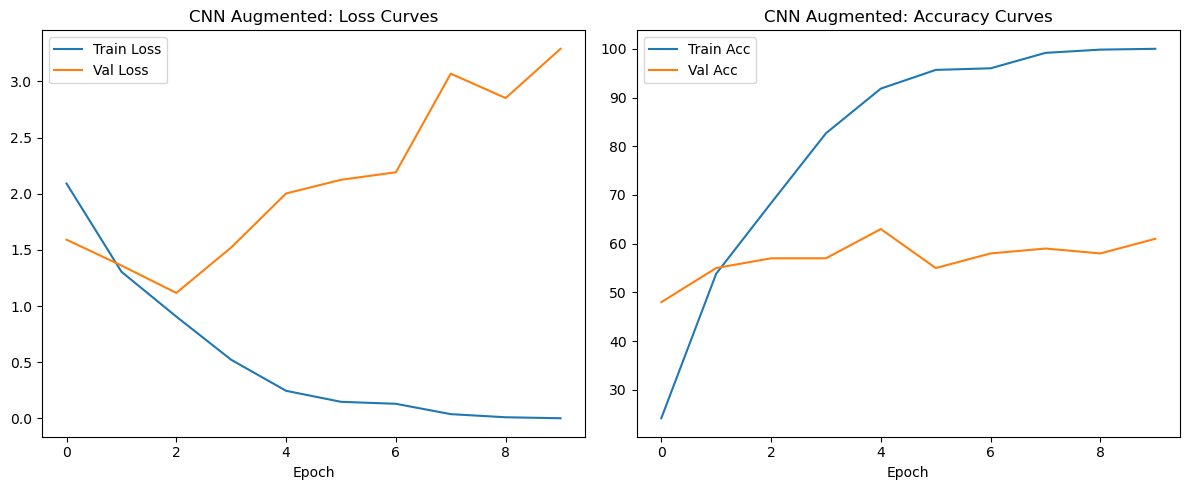

In [24]:
#Train and Eval on basic data
train_evaluate_plot(CNN, train_loader_basic, val_loader, optimizer=optimizer_CNN, loss_fn=criterion, n_epochs=n_epochs, title="CNN Basic", results_dict=results)

# Re-instantiate a new model for the augmented training
CNN_aug = SimpleCNNSequential().to(device)
# Optimizer
optimizer_CNN_aug = optim.Adam(CNN_aug.parameters(), lr=0.001)

#Train and Eval on augmented data
train_evaluate_plot(CNN_aug, train_loader_aug, val_loader, optimizer=optimizer_CNN_aug, loss_fn=criterion, n_epochs=n_epochs, title="CNN Augmented", results_dict=results)


#### **🧠 Why did the augmented version perform worse?**


#### 3.5 **(5pts) Improve the MNIST data transformations.**
- Define a new set of transformations for the `MNIST` dataset following the procedure outlined above.
- You must apply at least **two** different augmentations from `torchvision.transforms.v2`.
- Train a new model using these transformations. Your model should:
  - Achieve either higher accuracy than the baseline, or
  - Be no more than 5% lower in accuracy than the baseline model.

❗**Important:**
- Keep all other settings (model architecture, optimizer, number of epochs, etc.) the same for a fair comparison.
- Reuse the same training subset by using the same indices you used earlier. Do not resample new splits.
- You are encouraged to reuse any relevant code from earlier sections.
- In your code comments:
  - Clearly describe any changes you make.
  - Briefly explain why you chose each augmentation.

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 1/10: train_loss: 1.9542, train_acc: 32.33%, val_loss: 0.9463, val_acc: 66.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 2/10: train_loss: 0.8284, train_acc: 72.17%, val_loss: 0.3565, val_acc: 86.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 3/10: train_loss: 0.4481, train_acc: 85.67%, val_loss: 0.5349, val_acc: 82.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 4/10: train_loss: 0.2200, train_acc: 93.67%, val_loss: 0.4254, val_acc: 90.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 5/10: train_loss: 0.0664, train_acc: 97.83%, val_loss: 0.2416, val_acc: 92.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 6/10: train_loss: 0.0455, train_acc: 97.83%, val_loss: 0.4216, val_acc: 88.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 7/10: train_loss: 0.0387, train_acc: 99.00%, val_loss: 0.2937, val_acc: 94.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 8/10: train_loss: 0.0208, train_acc: 99.67%, val_loss: 0.2617, val_acc: 93.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 9/10: train_loss: 0.0156, train_acc: 99.67%, val_loss: 0.4416, val_acc: 94.00%


  0%|          | 0/19 [00:00<?, ?it/s]

Epoch 10/10: train_loss: 0.0309, train_acc: 99.17%, val_loss: 0.2968, val_acc: 95.00%


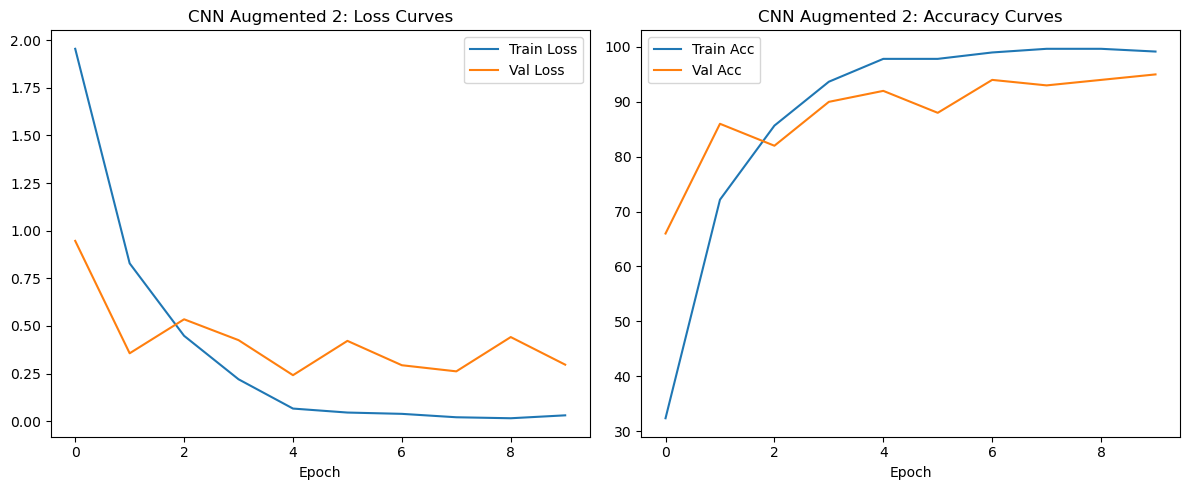

In [25]:
# New data augmentation
augmented_2 = v2.Compose([ #removed the rotation and flip transformations
    v2.ToImage(),
    v2.Resize((28, 28)),
    v2.RandomPerspective(distortion_scale=0.33,p=0.3), # introduce small perspective deformations on part of the dataset
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomErasing(p=0.3, scale=(0.02, 0.1), ratio=(0.3, 3.3)), # introduce missing data : defects / missing pixel, occlusion,... works only after tensor transformation not on PIL image
    v2.Normalize(mean=[0.5], std=[0.5]),
])

# New augmented train set, wrapper and loader
train_aug = datasets.MNIST(root = './data', train = True, download = True, transform = augmented_2)
train_aug_subset = Subset(train_aug, train_indices)
train_wrapper_aug = RAMDatasetWrapper(train_aug_subset)
train_loader_aug = DataLoader(train_wrapper_aug, batch_size=32, shuffle=True)

# Re-instantiate a new model for the augmented training
CNN_aug_2 = SimpleCNNSequential().to(device)
# Optimizer
optimizer_CNN_aug2 = optim.Adam(CNN_aug_2.parameters(), lr=0.001)

# Training on new augmented data
train_evaluate_plot(CNN_aug_2, train_loader_aug, val_loader, optimizer = optimizer_CNN_aug2, loss_fn = criterion, n_epochs = n_epochs, title = "CNN Augmented 2", results_dict = results)

#### 3.6 **(2pts) Analyze the validation loss and accuracy for the three models (CNN Basic, CNN Augmented, CNN Augmented 2).**
- Compare the performance of the models based on validation loss and accuracy.
- What insights can you draw from the results?
- Answer in maximum 3 sentences.

In [26]:
# Print header
print(f"{'Model':<25} | {'Val Loss':>15} | {'Val Acc':>15}")
print('-' * 62)

# Loop through results and print each row
for rtype, loss, acc in zip(results['types'], results['final_val_losses'], results['final_val_accs']):
    print(f"{rtype:<25} | {loss:>15.2f} | {acc:>15.2f}%")



Model                     |        Val Loss |         Val Acc
--------------------------------------------------------------
CNN Basic                 |            0.54 |           87.00%
CNN Augmented             |            3.29 |           61.00%
CNN Augmented 2           |            0.30 |           95.00%


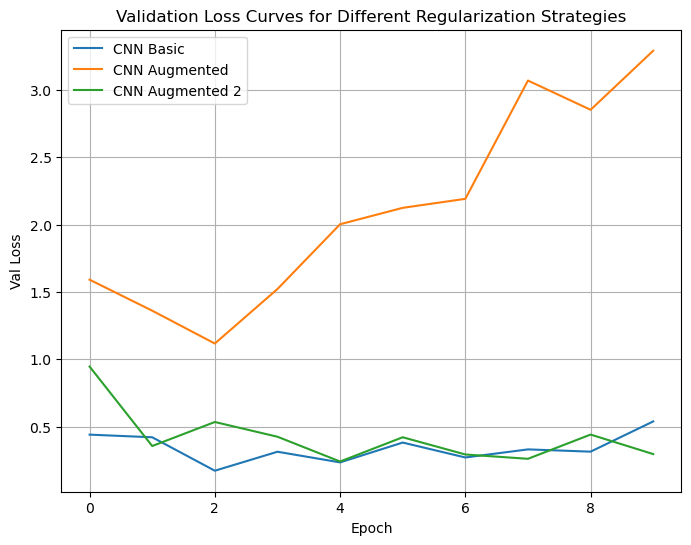

In [27]:
# Plot loss curves
plt.figure(figsize=(8,6))
for loss_curve, label in zip(results['val_loss_curves'], results['types']):
    plt.plot(np.arange(len(loss_curve)), loss_curve, label=label)
plt.legend()
plt.title('Validation Loss Curves for Different Regularization Strategies')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.grid(True)
plt.show()


- For the first augmented CNN  : the loss is higher and the accuracy is lower than the baseline probably because we introduce too much variations/combinations in the data and the model is underfitting.
- For the second augmented CNN : the loss is similar or lower (and more stable) than the baseline and the first augmented CNN, and the accuracy is better: this model should be more robust/give better generalisation towards new data.
    - The transformations done on the images are smaller in amplitudes: small perspective distortions of the images, erasing small part of the images (simulate pixel/data defect, occlusion) and we do not flip the numbers in any directions or rotate them.

In [28]:
print(points)

38.5


---
**Congratulations on completing this assignment!** 🎉  

You’ve explored the power of data augmentation and convolutional neural networks (CNNs) to improve model performance. By applying different augmentations and fine-tuning your models, you've gained valuable experience in improving generalization and handling overfitting.

Keep up the great work, and continue experimenting with new techniques! 🚀💡